<a href="https://colab.research.google.com/github/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/blob/master/Deep_Learning_for_Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Classify Traffic Signs Using Deep Learning for Self-Driving Cars</h1> 
</strong>

---



- Task 1: Project Overview
- Task 2: Import Libraries and datasets
- Task 3: Perform image visualization
- Task 4: Convert images to gray-scale and perform normalization
- Task 5: Understand the theory and intuition behind Convolutional Neural Networks
- Task 6: Build a deep convolutional network model using Keras
- Task 7: Compile and train deep convolutional network model
- Task 8: Assess trained model performance

## __Task 1:__ Project Overview


<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/master/Proj_png/01.png' height='400' width='900'></a>
</p>

<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/master/Proj_png/02.png' height='400' width='900'></a>
</p>

## __Task 2:__ Importing Libraries/Datasets

In [1]:
! wget https://www.dropbox.com/s/v2r77l4wgfkrb1r/traffic_signs_data.zip

--2020-11-29 16:50:14--  https://www.dropbox.com/s/v2r77l4wgfkrb1r/traffic_signs_data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/v2r77l4wgfkrb1r/traffic_signs_data.zip [following]
--2020-11-29 16:50:15--  https://www.dropbox.com/s/raw/v2r77l4wgfkrb1r/traffic_signs_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc43345b98625325a71fc398d929.dl.dropboxusercontent.com/cd/0/inline/BEKO4iLRETd1KO9Z08zbLNbHo5OFC4LyrPqxztrOKQXT3J3uBFBjFM2GhwFJy0F3eRUUxfYewdp5zUuK4SWhlhgneHcCmttmn71P0_DepRhxLRdkp-l2zYqoT98REai0wMg/file# [following]
--2020-11-29 16:50:15--  https://uc43345b98625325a71fc398d929.dl.dropboxusercontent.com/cd/0/inline/BEKO4iLRETd1KO9Z08zbLNbHo5OFC4LyrPqxztrOKQXT3J3uBFBjFM2GhwFJy0F3eRUUxfYewdp5zUuK4SWh

In [2]:
ls

sample_data/  traffic_signs_data.zip


In [3]:
! unzip -uq '/content/traffic_signs_data.zip' -d '/content'

In [4]:
ls

sample_data/  test.p  traffic_signs_data.zip  train.p  valid.p


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import random

print(tf.__version__)

2.3.0


<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/master/Proj_png/03.png' height='400' width='900'>
</a>
</p>

In [6]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [7]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [8]:
X_train.shape

(34799, 32, 32, 3)

In [9]:
y_train.shape

(34799,)

## __Task 3:__ Perform Images Visualization

5

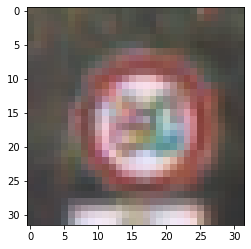

In [10]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

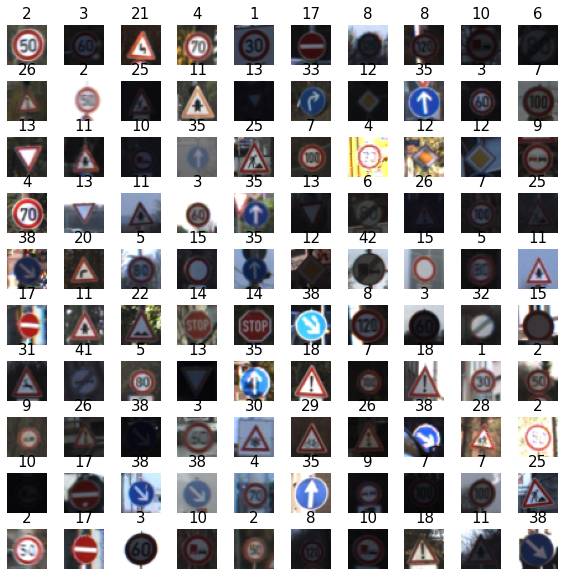

In [11]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)        

## __Task 4:__ Convert Images to grayscale and Perform Normalization

In [12]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [13]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [14]:
X_train_gray.shape


(34799, 32, 32, 1)

In [15]:
X_test_gray.shape


(12630, 32, 32, 1)

In [16]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [17]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [18]:
X_train_gray_norm

array([[[[ 0.48177083],
         [ 0.47395833],
         [ 0.46354167],
         ...,
         [ 0.41927083],
         [ 0.43229167],
         [ 0.40885417]],

        [[ 0.47135417],
         [ 0.46875   ],
         [ 0.48177083],
         ...,
         [ 0.42447917],
         [ 0.40625   ],
         [ 0.40364583]],

        [[ 0.46875   ],
         [ 0.47135417],
         [ 0.48177083],
         ...,
         [ 0.39322917],
         [ 0.38802083],
         [ 0.390625  ]],

        ...,

        [[ 0.45052083],
         [ 0.4453125 ],
         [ 0.43489583],
         ...,
         [ 0.36979167],
         [ 0.34635417],
         [ 0.35677083]],

        [[ 0.44010417],
         [ 0.48177083],
         [ 0.47135417],
         ...,
         [ 0.38802083],
         [ 0.38020833],
         [ 0.3828125 ]],

        [[ 0.43229167],
         [ 0.5078125 ],
         [ 0.48177083],
         ...,
         [ 0.37760417],
         [ 0.3984375 ],
         [ 0.3984375 ]]],


       [[[ 0.23177083],


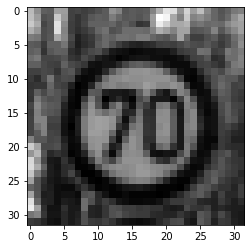

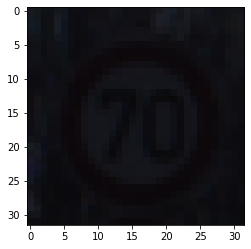

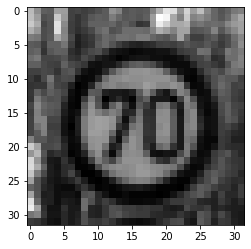

In [19]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

## __Task 5:__ Understand the theory and intution brhind Convolution Neural Network

<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/master/Proj_png/04.png' height='400' width='900'>
</a>
</p>

<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/master/Proj_png/05.png' height='400' width='900'></a>
</p>


## __Task 6:__ Build Deep Convolution Neural Network Model

In [20]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
model.add(layers.AveragePooling2D())
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(16, (5,5), activation = 'relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(120, activation = 'relu'))
model.add(layers.Dense(84, activation = 'relu'))
model.add(layers.Dense(43, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## __Task 7:__ Compile and Train Deep CNN Model 

In [21]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
history = model.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 1s 9ms/step - loss: 3.2958 - accuracy: 0.1449 - val_loss: 2.9257 - val_accuracy: 0.2655
Epoch 2/50
70/70 [==============================] - 0s 5ms/step - loss: 1.9004 - accuracy: 0.4795 - val_loss: 1.5133 - val_accuracy: 0.5739
Epoch 3/50
70/70 [==============================] - 0s 5ms/step - loss: 1.0420 - accuracy: 0.7011 - val_loss: 1.0913 - val_accuracy: 0.6698
Epoch 4/50
70/70 [==============================] - 0s 5ms/step - loss: 0.7457 - accuracy: 0.7909 - val_loss: 0.9059 - val_accuracy: 0.7354
Epoch 5/50
70/70 [==============================] - 0s 5ms/step - loss: 0.5990 - accuracy: 0.8328 - val_loss: 0.8133 - val_accuracy: 0.7603
Epoch 6/50
70/70 [==============================] - 0s 5ms/step - loss: 0.4942 - accuracy: 0.8660 - val_loss: 0.7463 - val_accuracy: 0.7780
Epoch 7/50
70/70 [==============================] - 0s 5ms/step - loss: 0.4216 - accuracy: 0.8874 - val_loss: 0.6714 - val_accuracy: 0.8011
Epoch 8/50
70/70 [==

## __Task 8:__ Assess Trained CNN Model Performance 

In [23]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.2018 - accuracy: 0.8630
Test Accuracy: 0.8630245327949524


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

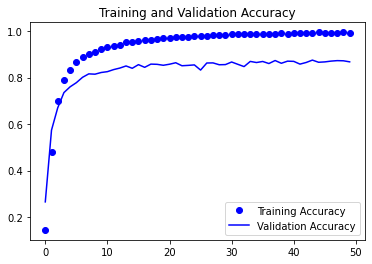

In [26]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

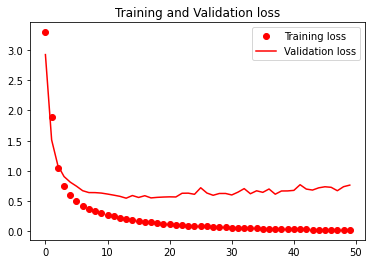

In [27]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [28]:
predicted_classes = model.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


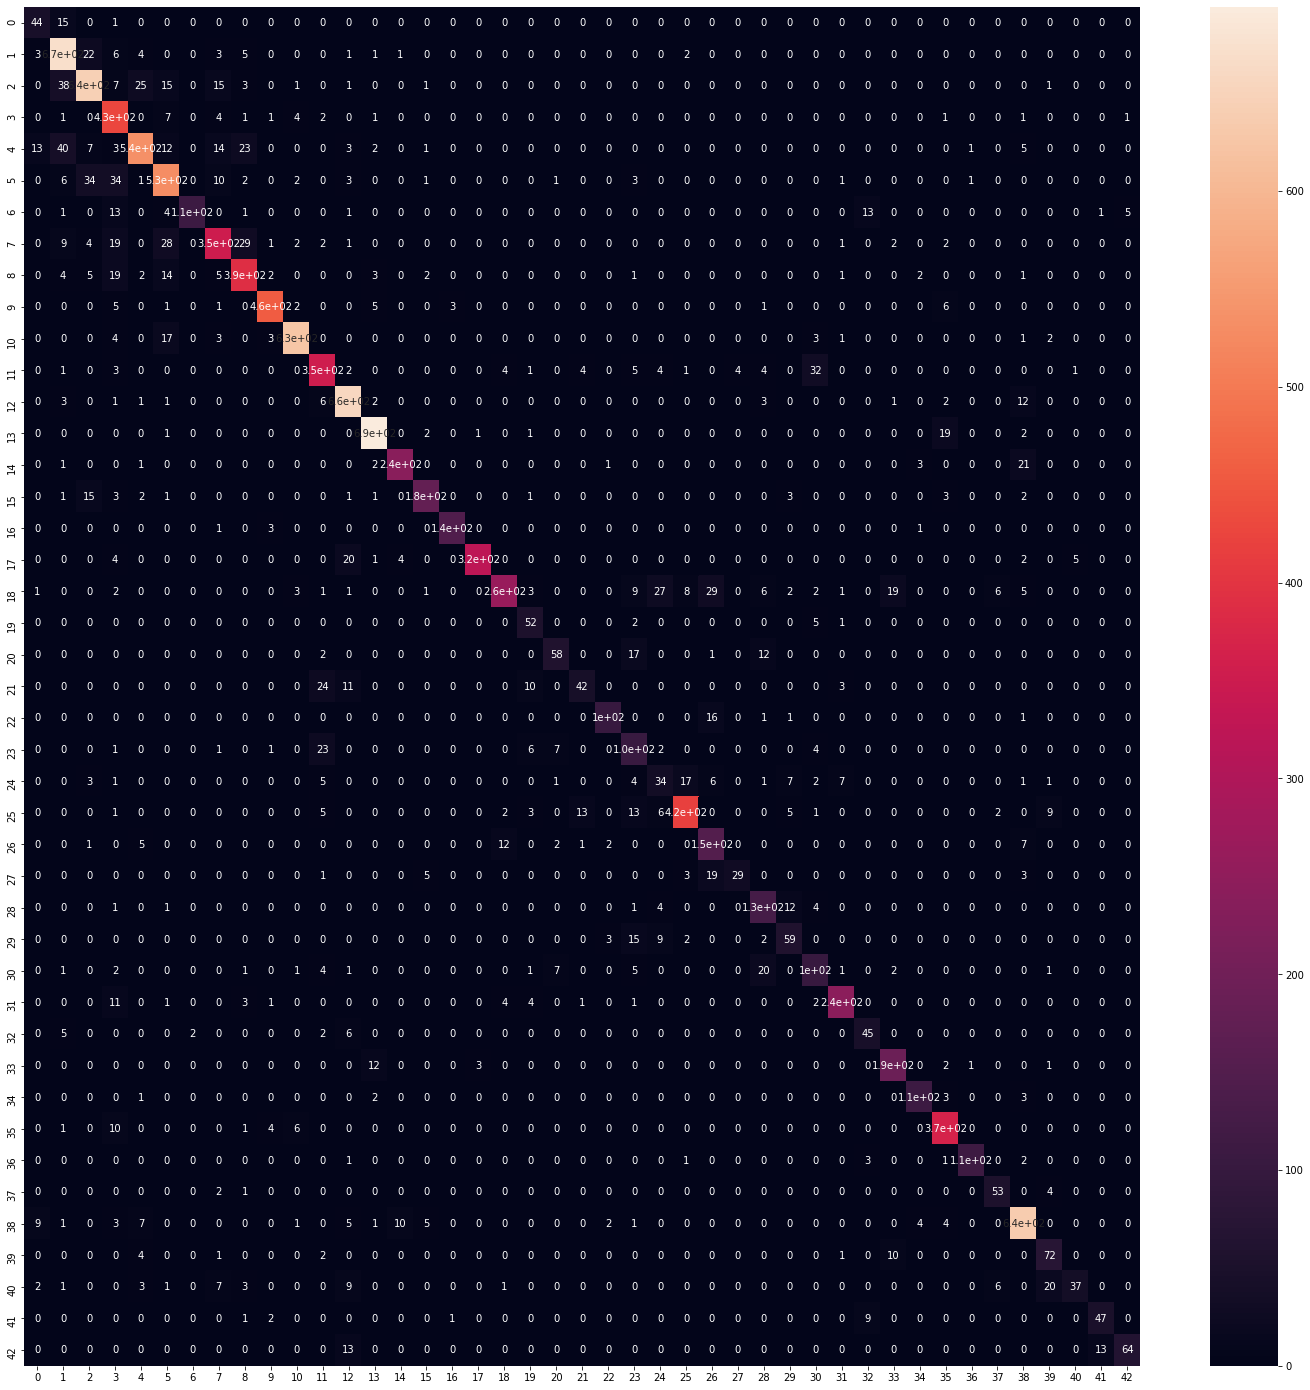

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

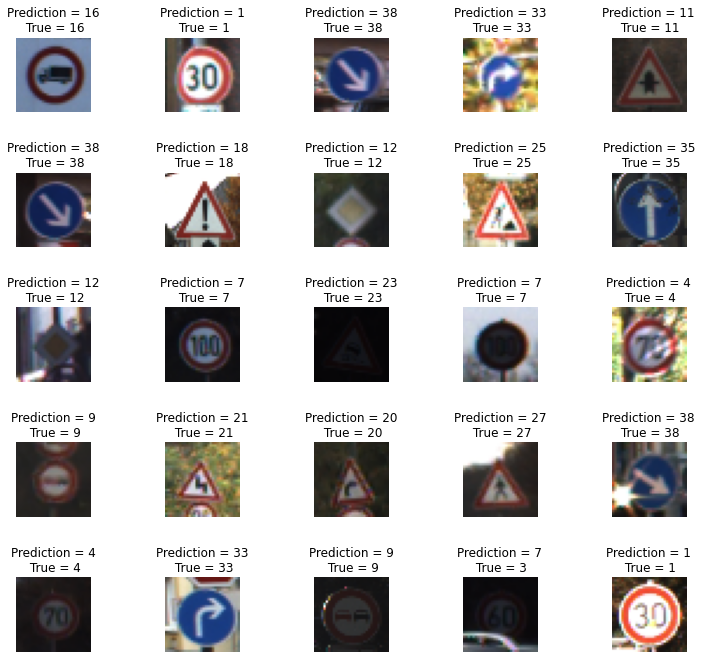

In [30]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# __Thats All Folks!__